In [1]:
#Our data:

from sklearn.decomposition import DictionaryLearning
import numpy as np
import create_data_upd as OD

# Define dimensions
n_features = 4000   # Number of columns in A
cs_ratio=0.5
n_samples = cs_ratio*n_features  # Number of rows in A (measurements)
k_sparse = 5  #precentage
len_test = 1000
rows = 400
cols = 10
sig1vt_supp=10
zt_noise_sigma=0.01
data = OD.Data(rows=rows, cols=cols, sig1vt_supp=sig1vt_supp, k_sparse=k_sparse,zt_noise_sigma=zt_noise_sigma)
X_dataset_test, C_dataset_test, Z_dataset_test = data.create_Dataset(len_test)

# Generate some sample data

Z=Z_dataset_test.reshape(len_test,-1,order='F')
Z=(Z-Z.mean())/Z.std()


# Instantiate a DictionaryLearning object
dict_learner_od = DictionaryLearning(n_components=4000,  # number of dictionary elements
                                  transform_algorithm='lasso_lars',  # sparse coding method
                                  transform_alpha=0.1,  # sparsity controlling parameter
                                  random_state=0)

# Fit to the data and transform it
V_od = dict_learner_od.fit_transform(Z)

# Extract the dictionary
D_od = dict_learner_od.components_

# Check the shape of the outputs
print("Dictionary shape:", D_od.shape)
print("Transformed data (sparse codes) shape:", V_od.shape)


ModuleNotFoundError: No module named 'create_data_upd'

In [ ]:
import torch
tensors={'D_od':D_od,'V_od':V_od}
torch.save(tensors,'Dict_learn_Z_4000*4000.pt')

In [ ]:
from sklearn.linear_model import orthogonal_mp

sparse_codes = orthogonal_mp(D_od, Z.T, n_nonzero_coefs=int(30/100*4000), precompute=True)

# Check the shape of the output
print("Shape of sparse codes:", sparse_codes.shape)

Shape of sparse codes: (4000, 1000)


In [ ]:
# Reconstruct data from the sparse codes
Z_reconstructed = np.dot(D_od, sparse_codes)

# Transpose back if necessary
Z_reconstructed = Z_reconstructed.T

# Calculate reconstruction error
recovery_error = np.linalg.norm(Z - Z_reconstructed) / np.linalg.norm(Z)
print("Relative recovery error: {:.4f}".format(recovery_error))

Relative recovery error: 0.7471


In [ ]:
D_od

array([[-0.00245039, -0.00923878,  0.06664578, ..., -0.00749138,
        -0.0038735 ,  0.00097489],
       [-0.00203169, -0.00037788,  0.0007084 , ...,  0.01321875,
        -0.00281778, -0.0016095 ],
       [-0.00441714, -0.0053049 , -0.00466249, ..., -0.00182575,
        -0.00243185, -0.00203647],
       ...,
       [-0.0028329 , -0.00398195, -0.00350538, ..., -0.00431692,
        -0.00077834, -0.0016181 ],
       [-0.00208405, -0.01450722,  0.00054972, ..., -0.00788987,
        -0.00883039, -0.00513028],
       [-0.00866728, -0.01217642,  0.01499835, ..., -0.01394747,
        -0.00242622, -0.00200935]])

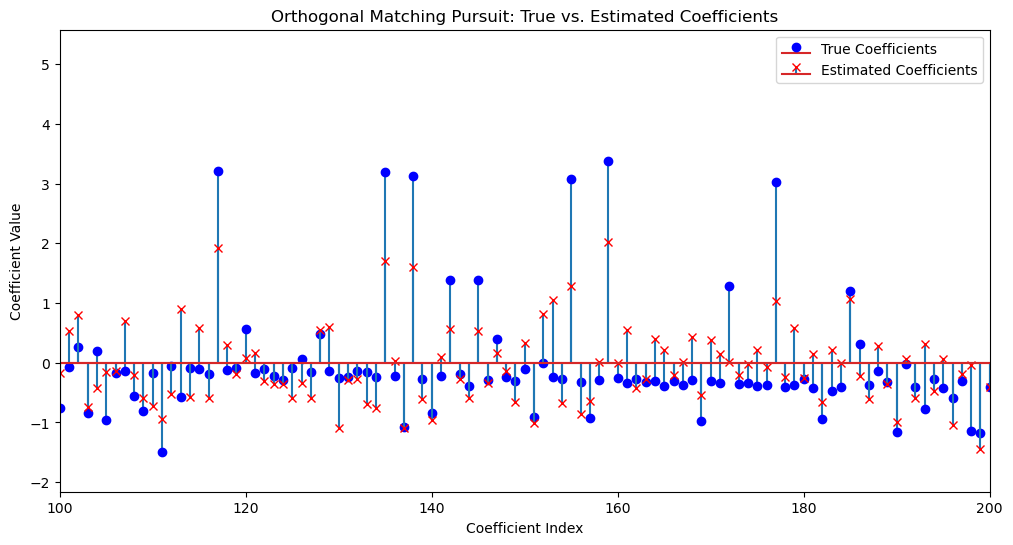

In [ ]:
import matplotlib.pyplot as plt
z=Z[0,:]
z_rec=Z_reconstructed[0,:]

plt.figure(figsize=(12, 6))
plt.stem(z, markerfmt='bo', label='True Coefficients')
plt.stem(z_rec, markerfmt='rx', label='Estimated Coefficients')
plt.xlim(100,200)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Orthogonal Matching Pursuit: True vs. Estimated Coefficients')
plt.legend()
plt.show()

In [4]:
#finding dictionary for X-avg(x): Itay - run fron this!

from sklearn.decomposition import DictionaryLearning
import numpy as np
import create_data_upd as OD
from sklearn.linear_model import orthogonal_mp

# Define dimensions
n_features = 4000   # Number of columns in A
cs_ratio=0.5
n_samples = cs_ratio*n_features  # Number of rows in A (measurements)
k_sparse = 5  #precentage
len_test = 1000
rows = 400
cols = 10
sig1vt_supp=10
zt_noise_sigma=0.01
data = OD.Data(rows=rows, cols=cols, sig1vt_supp=sig1vt_supp, k_sparse=k_sparse,zt_noise_sigma=zt_noise_sigma)
X_dataset_test, C_dataset_test, Z_dataset_test = data.create_Dataset(len_test)

In [5]:
# Generate some sample data

X_AVG=X_dataset_test-X_dataset_test.mean(axis=2,keepdims=True)
X_AVG=X_dataset_test.reshape(len_test,-1,order='F')

X_AVG=(X_AVG-X_AVG.mean())/X_AVG.std()


# Instantiate a DictionaryLearning object
dict_learner_od_x = DictionaryLearning(n_components=4000,  # number of dictionary elements
                                  transform_algorithm='lasso_lars',  # sparse coding method
                                  transform_alpha=0.1,  # sparsity controlling parameter
                                  random_state=0)

# Fit to the data and transform it
V_od_x = dict_learner_od_x.fit_transform(X_AVG)

# Extract the dictionary
D_od_x = dict_learner_od_x.components_

# Check the shape of the outputs
print("Dictionary shape:", D_od_x.shape)
print("Transformed data (sparse codes) shape:", V_od_x.shape)


Dictionary shape: (4000, 4000)
Transformed data (sparse codes) shape: (1000, 4000)


In [4]:
import torch
tensors={'D_od_x':D_od_x,'V_od_x':V_od_x}
torch.save(tensors,'Dict_learn_Z_4000*4000.pt')


NameError: name 'D_od_x' is not defined

In [5]:
import torch
tensors=torch.load('Dict_learn_X_4000_4000.pt')
D_od_x=tensors['D_od_x']
V_od_x=tensors['V_od_x']

<ipython-input-5-210642eb8ccf>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensors=torch.load('Dict_learn_X_4000_4000.pt')


In [ ]:
# Generate some sample data

X_AVG=X_dataset_test-X_dataset_test.mean(axis=2,keepdims=True)
X_AVG=X_dataset_test.reshape(len_test,-1,order='F')

X_AVG=(X_AVG-X_AVG.mean())/X_AVG.std()

sparse_codes_x = orthogonal_mp(D_od_x, X_AVG.T, n_nonzero_coefs=30,tol=100, precompute=True)

# Check the shape of the output
print("Shape of sparse codes:", sparse_codes_x.shape)
X_reconstructed = np.dot(D_od_x, sparse_codes_x)

# Transpose back if necessary
X_reconstructed = X_reconstructed.T

# Calculate reconstruction error
recovery_error = np.linalg.norm(X_AVG - X_reconstructed) / np.linalg.norm(X_AVG)
print("Relative recovery error: {:.4f}".format(recovery_error))

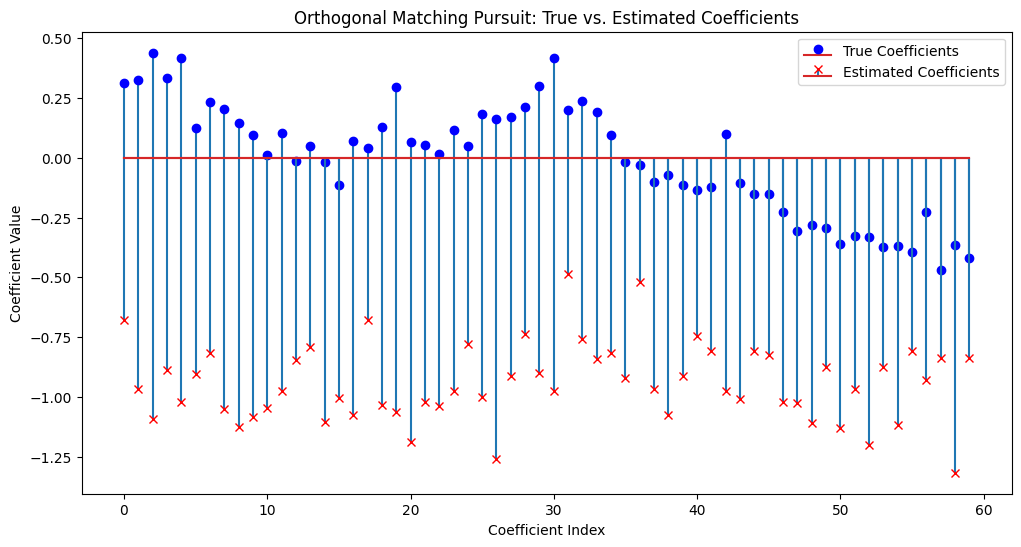

In [16]:
import matplotlib.pyplot as plt
z=X_AVG[0,610:670]
z_avg= z.mean()
z=z-z_avg
z_rec=X_reconstructed[0,610:670]
z_rec=z_rec-z_avg


plt.figure(figsize=(12, 6))
plt.stem(z, markerfmt='bo', label='True Coefficients')
plt.stem(z_rec, markerfmt='rx', label='Estimated Coefficients')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Orthogonal Matching Pursuit: True vs. Estimated Coefficients')
plt.legend()
plt.show()



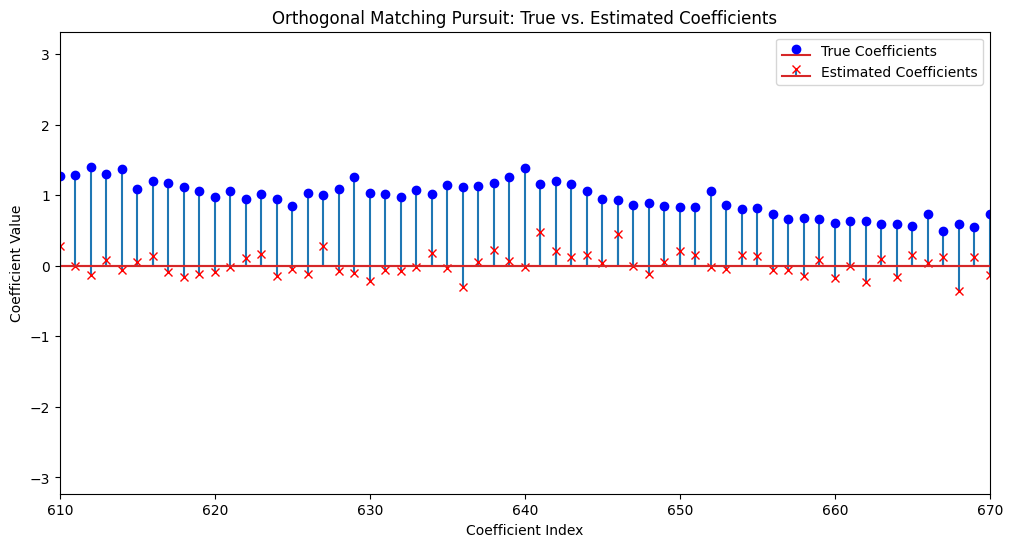

In [19]:

x=X_AVG[0,:]
x_rec=X_reconstructed[0,:]

plt.figure(figsize=(12, 6))
plt.stem(x, markerfmt='bo', label='True Coefficients')
plt.stem(x_rec, markerfmt='rx', label='Estimated Coefficients')
plt.xlim(610,670)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Orthogonal Matching Pursuit: True vs. Estimated Coefficients')
plt.legend()
plt.show()
